<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster/blob/main/lab_200_MDP_Q_learning_Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Leaarning

## Markov Chains

In [ ]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
import numpy as np
import os
np.random.seed(42)
tf.random.set_seed(42)
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

transition_probabilities = [ # shape=[s, s']
        [0.7, 0.2, 0.0, 0.1],  # from s0 to s0, s1, s2, s3
        [0.0, 0.0, 0.9, 0.1],  # from s1 to ...
        [0.0, 1.0, 0.0, 0.0],  # from s2 to ...
        [0.0, 0.0, 0.0, 1.0]]  # from s3 to ...

n_max_steps = 50

def print_sequence():
    current_state = 0
    print("States:", end=" ")
    for step in range(n_max_steps):
        print(current_state, end=" ")
        if current_state == 3:
            break
        current_state = np.random.choice(range(4), p=transition_probabilities[current_state])
    else:
        print("...", end="")
    print()

for _ in range(10):
    print_sequence()

States: 0 0 3 
States: 0 1 2 1 2 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 
States: 0 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 ...
States: 0 0 3 
States: 0 0 0 1 2 1 2 1 3 
States: 0 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3 


## MDP
- Let's define some transition probabilities, rewards and possible actions. For example, in state s0, if action a0 is chosen then with proba 0.7 we will go to state s0 with reward +10, with probability 0.3 we will go to state s1 with no reward, and with never go to state s2 (so the transition probabilities are [0.7, 0.3, 0.0], and the rewards are [+10, 0, 0]):

In [ ]:
transition_probabilities = [ # shape=[s, a, s']
        [[0.7, 0.3, 0.0], 
         [1.0, 0.0, 0.0], 
         [0.8, 0.2, 0.0]],

        [[0.0, 1.0, 0.0], 
         None, 
         [0.0, 0.0, 1.0]],

        [None, 
         [0.8, 0.1, 0.1], 
         None]]

rewards = [ # shape=[s, a, s']
        [[+10, 0, 0], 
         [0, 0, 0], 
         [0, 0, 0]],

        [[0, 0, 0], 
         [0, 0, 0], 
         [0, 0, -50]],

        [[0, 0, 0], 
         [+40, 0, 0], 
         [0, 0, 0]]]

possible_actions = [[0, 1, 2], [0, 2], [1]]

In [ ]:
print(transition_probabilities[0][0])

[0.7, 0.3, 0.0]


In [ ]:
print(rewards[0][0])

[10, 0, 0]


In [ ]:
print(possible_actions[0])

[0, 1, 2]


## Q-value Iteration

In [ ]:
Q_values = np.full((3, 3), -np.inf)    # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0     # for all possible actions

In [ ]:
Q_values

array([[  0.,   0.,   0.],
       [  0., -inf,   0.],
       [-inf,   0., -inf]])

In [ ]:
gamma = 0.90  # the discount factor

history1 = [] 
for iteration in range(50): 
    Q_prev = Q_values.copy()
    history1.append(Q_prev) 
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp])) for sp in range(3)])

history1 = np.array(history1)

In [ ]:
history1.round(2)[:5]

array([[[  0.  ,   0.  ,   0.  ],
        [  0.  ,   -inf,   0.  ],
        [  -inf,   0.  ,   -inf]],

       [[  7.  ,   0.  ,   0.  ],
        [  0.  ,   -inf, -50.  ],
        [  -inf,  32.  ,   -inf]],

       [[ 11.41,   6.3 ,   5.04],
        [  0.  ,   -inf, -21.2 ],
        [  -inf,  39.92,   -inf]],

       [[ 14.19,  10.27,   8.22],
        [  0.  ,   -inf, -14.07],
        [  -inf,  43.81,   -inf]],

       [[ 15.94,  12.77,  10.22],
        [  0.  ,   -inf, -10.57],
        [  -inf,  46.16,   -inf]]])

In [ ]:
Q_values

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

In [ ]:
history1[-1]

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971489],
       [       -inf, 50.13365013,        -inf]])

In [ ]:
history1.shape

(50, 3, 3)

In [ ]:
np.argmax(Q_values, axis=1)  # actions

array([0, 0, 1])

- 0.90의 할인 계수를 사용할 때 이 MDP에 대한 최적의 정책은 상태 s0에 있을 때 action a0을 선택하고 상태 s1에 있을 때 action a0을 선택하고 마지막으로 상태 s2에 있을 때 action a1(유일한 가능한 action)을 선택한다.

- Let's try again with a discount factor of 0.95:

In [ ]:
Q_values = np.full((3, 3), -np.inf) # -np.inf for impossible actions
for state, actions in enumerate(possible_actions):
    Q_values[state, actions] = 0.0  # for all possible actions

In [ ]:
gamma = 0.95  # the discount factor

for iteration in range(50):
    Q_prev = Q_values.copy()
    for s in range(3):
        for a in possible_actions[s]:
            Q_values[s, a] = np.sum([
                    transition_probabilities[s][a][sp]
                    * (rewards[s][a][sp] + gamma * np.max(Q_prev[sp]))
                for sp in range(3)])

In [ ]:
Q_values.round(2)

array([[21.73, 20.64, 16.7 ],
       [ 0.95,  -inf,  1.01],
       [ -inf, 53.71,  -inf]])

In [ ]:
np.argmax(Q_values, axis=1)

array([0, 2, 1])

- 이제 정책이 변경되었다. 상태 s1에서 우리는 이제 불을 통과하는 것을 선호한다 (액션 a2 선택). 할인 요인이 더 크기 때문에 에이전트는 미래를 더 중요하게 여기므로 더 많은 미래 보상을 얻기 위해 즉각적인 패널티를 지불할 준비가 되어 있기 때문이다.

## Q-Learning
- Q-Learning은 Agent의 플레이를 관찰하고(예: 무작위로) Q-값의 추정치를 점진적으로 개선함으로써 작동한다. 정확한 Q-Value 추정값(또는 충분히 근접한)이 있으면 최적의 정책은 가장 높은 Q-Value를 갖는 작업을 선택한다. (Greedy Policy).



- Environment 를 대신하도록 새 상태와 보상을 가져오는 함수를 정의한다.

In [ ]:
def step(state, action):
    probas = transition_probabilities[state][action]
    next_state = np.random.choice([0, 1, 2], p=probas)
    reward = rewards[state][action][next_state]
    return next_state, reward

- 가능한 모든 상태를 여러 번 방문하는 한 모든 정책이 될 수 있는 탐색 정책도 필요하다. 상태 공간이 매우 작기 때문에 무작위 정책을 사용한다.

In [ ]:
# random policy
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

# epsilon-greedy
def exploration_policy2(state, epsilon=0.1):
    if np.random.rand() <= epsilon:
        return np.random.choice(possible_actions[state])
    else:
        return np.argmax(Q_values[state])

Now let's initialize the Q-Values like earlier, and run the Q-Learning algorithm:

In [ ]:
np.random.seed(42)

# Q_values = np.full((3, 3), -np.inf)
# for state, actions in enumerate(possible_actions):
#    Q_values[state][actions] = 0
Q_values = np.full((3, 3), 0.0)

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history2 = [] 

for iteration in range(10000):
    history2.append(Q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(Q_values[next_state]) # greedy policy at the next step
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    state = next_state

history2 = np.array(history2)
print(Q_values)

[[18.77621289 17.2238872  13.74543343]
 [ 0.          0.         -8.00485647]
 [ 0.         49.40208921  0.        ]]


In [ ]:
history2.round(2)[-5:]

array([[[18.78, 17.22, 13.75],
        [ 0.  ,  0.  , -8.01],
        [ 0.  , 49.39,  0.  ]],

       [[18.79, 17.22, 13.75],
        [ 0.  ,  0.  , -8.01],
        [ 0.  , 49.39,  0.  ]],

       [[18.77, 17.22, 13.75],
        [ 0.  ,  0.  , -8.01],
        [ 0.  , 49.39,  0.  ]],

       [[18.77, 17.22, 13.75],
        [ 0.  ,  0.  , -8.  ],
        [ 0.  , 49.39,  0.  ]],

       [[18.77, 17.22, 13.75],
        [ 0.  ,  0.  , -8.  ],
        [ 0.  , 49.4 ,  0.  ]]])

In [ ]:
np.argmax(Q_values, axis=1) # optimal action for each state

array([0, 0, 1])

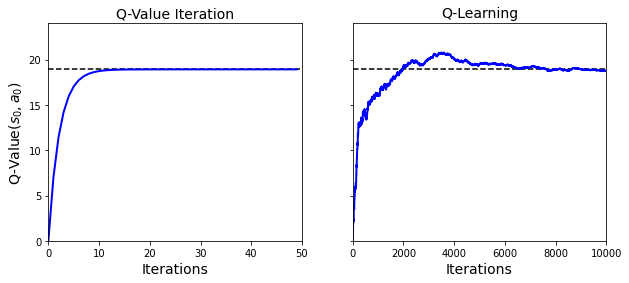

In [ ]:
true_Q_value = history1[-1, 0, 0]  # last value of (s0,a0)

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history1, history2)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

- 위의 그림은 Q_Value(s0,a0) 의 수렴 과정을 보이고 있다. 그림에서 보듯이, Q-Value 반복 알고리즘(왼쪽)은 20회 미만의 반복으로 매우 빠르게 수렴하는 반면 Q-Learning 알고리즘(오른쪽)은 수렴하는 데 약 8,000회 반복이 걸린다. 예상할 수 있듯이, 상태전이확률이나 보상을 모르면 최적의 정책을 찾는 것이 훨씬 더 어려워진다.

## SARSA

In [ ]:
np.random.seed(42)

# Q_values = np.full((3, 3), -np.inf)
# for state, actions in enumerate(possible_actions):
#    Q_values[state][actions] = 0
Q_values = np.full((3, 3), 0.0)

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history3 = [] # Not shown in the book

action = exploration_policy2(state, 0.5)
for iteration in range(10000):
    history3.append(Q_values.copy()) # Not shown

    next_state, reward = step(state, action)
    next_action = exploration_policy2(next_state, 0.5)   # on-policy
    next_value = Q_values[next_state, next_action]
    alpha = alpha0 / (1 + iteration * decay)
    Q_values[state, action] *= 1 - alpha
    Q_values[state, action] += alpha * (reward + gamma * next_value)
    #if (iteration < 50):
    #    print(state, next_state, action, next_action, Q_values[state, action], 
    #          Q_values[next_state, next_action])
    state = next_state
    action = next_action

history3 = np.array(history3) # Not shown

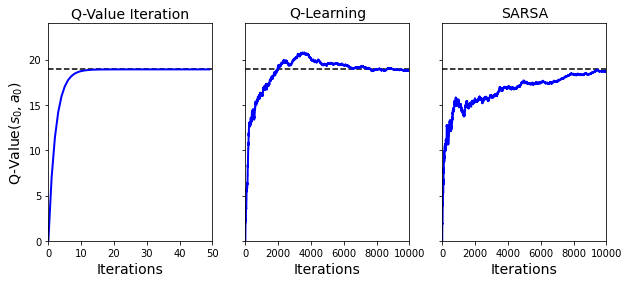

In [ ]:
true_Q_value = history1[-1, 0, 0]  # last value of (s0,a0)

fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
axes[2].set_title("SARSA", fontsize=14)
for ax, width, history in zip(axes, (50, 10000, 10000), (history1, history2, history3)):
    ax.plot([0, width], [true_Q_value, true_Q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])